<a href="https://colab.research.google.com/github/spaceml-org/GIBS-Downloader/blob/fernando%2Ftiling-speedup/notebooks/GIBS_Downloader_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIBS Downloader Demo

### Installing GIBS Downloader

We first need to install GDAL. To do that, we first install Miniconda.

In [ ]:
# This cell installs Miniconda. It will restart the kernel, don't worry
!pip install -q condacolab
import condacolab
condacolab.install_miniconda()

Now, install GDAL

In [ ]:
!conda install -c conda-forge gdal=3.2.0

Next, we install the actual GIBS Downloader. You will see some warnings, but they can be ignored.

In [ ]:
# You will need to run this as well just for this colab notebook
!pip install ipykernel

# Install GIBS Downloader
!pip install "git+https://github.com/spaceml-org/GIBS-Downloader.git#egg=GIBSDownloader"

### Installing TensorFlow
If you wish to generate TFRecords, then you will need to install TensorFlow as well

In [ ]:
# If you want to generate TFRecords:
!pip install tensorflow==2.5.0

We are now ready to make use of GIBS Downloader and all of its features!

# Using GIBS Downloader

Let's break down the example in the README

In [ ]:
# Simply download images of this region covering this range of dates (2020-09-15 to 2020-09-30)
!gdl 2020-09-15 2020-09-30 "37.003277, -124.328539" "40.353784, -120.253964"

In [5]:
# Check that the images have been downloaded
%ls

condacolab_install.log
sample_data/
VIIRS-SNPP-CorrectedReflectance-TrueColor_37.0033_-124.3285_20200915-20200930/


The images have been downloaded. What else can we do with them?

#### Tiling

In [ ]:
# Break the downloaded images into 256x256 tiles WITH multiprocessing.
# Note that the download command looks almost the same as the previous, except for the new flags.
# The downloader will first check to see if that region and range of dates has been downloaded already before it downloads the same images twice.
# When we run this cell after the prior, we will skip directly to tiling the downloaded images.
!gdl 2020-09-15 2020-09-30 "37.003277, -124.328539" "40.353784, -120.253964" --tile=true --tile-width=256 --tile-height=256 --mp=true

#### TFRecord writing

TFRecords is a binary file format can be used in efficient machine learning pipelines. We generate them with one flag which enables high performance machine training. (Autoencoder Colab notebook which utilizes TFRecords will be soon released) 

In [ ]:
# In order to generate TFRecords, we specify which tile sizes we would like to turn into TFRecords
# Like with downloading the original images, if the specified tile size already exists, we use the already generated tiles
# If the tiles do not exist, we create them
!gdl 2020-09-15 2020-09-30 "37.003277, -124.328539" "40.353784, -120.253964" --tile=true --tile-width=256 --tile-height=256 --mp=true --gen-tfrecords=true

#### Animation

With one additional flag, we can bring out images to life by generating a timelapse-style video.

In [ ]:
!gdl 2020-09-15 2020-09-30 "37.003277, -124.328539" "40.353784, -120.253964" --animate=true

### Product Search

How about other kinds of imagery products? We can search for certain products by keywords with the same command. 


Let's say we would like to download imagery of the population density of northeastern United States. We can search for a matching product as follows:

In [6]:
!gdl 2020-09-15 2020-09-15 "33.33220194089801, -116.2071864542481" "47.13878705347208, -66.28531296463223" --name="population density"




Please enter the full imagery product name from the following list:

       Imagery_Product_Name Image_Resolution
GPW_Population_Density_2000              1km
GPW_Population_Density_2005              1km
GPW_Population_Density_2010              1km
GPW_Population_Density_2015              1km
GPW_Population_Density_2020              1km






We can now copy the valid product name for 2020 from the prior cell's output and download population density images

In [8]:
!gdl 2020-09-15 2020-09-15 "33.33220194089801, -116.2071864542481" "47.13878705347208, -66.28531296463223" --name="GPW_Population_Density_2020"

Input file size is 40960, 20480
0...10...20...30...40...50...60...70...80...90...100 - done.
The specified region and set of dates have been downloaded


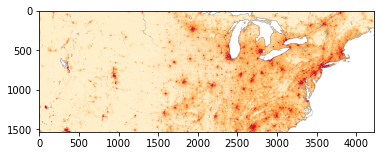

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = plt.imread('/content/GPW-Population-Density-2020_33.3322_-116.2072_20200915-20200915/original_images/GPW-Population-Density-2020_2020-09-15.png')
imgplot = plt.imshow(img)
plt.show()

Congratulations, you are now ready to begin acquiring NASA imagery for all of your Earth science needs with just one line!